# TUGAS 5 BAGIAN FINAL

## Ade Irawan (G5501211005)

### DATA 1 --> PLOT : PLOT WITH VIOLIN ; METODE : AUTOREGRESSIVE

In [1]:
using Plots
using Statistics
using DataFrames
using XLSX
using RDatasets

In [2]:
# untuk mendeskripsikan data xlsx dapat digunakan fungsi berikut.
R = XLSX.readxlsx("Data 1 (1).xlsx")

XLSXFile("Data 1 (1).xlsx") containing 3 Worksheets
            sheetname size          range        
-------------------------------------------------
            Deskripsi 5x2           A1:B5        
          Harga Saham 133x5         A1:E133      
         Return Saham 133x5         A1:E133      


In [3]:
Harga_Saham = R["Harga Saham"][:]
Harga_Saham = DataFrame(Harga_Saham[2:end,:],Symbol.(Harga_Saham[1,:]))

,Waktu,WIKA,BISI,BSDE,NIKL
,Any,Any,Any,Any,Any
1,2010-01-01,291.713,1540,779.684,255
2,2010-02-01,310.235,1380,566.199,235
3,2010-03-01,324.126,1480,566.199,295
4,2010-04-01,393.581,1810,779.684,340
5,2010-05-01,328.756,1280,640.454,270
6,2010-06-01,398.212,1340,668.3,295
7,2010-07-01,500.08,1470,751.838,315
8,2010-08-01,546.383,1700,761.12,310
9,2010-09-01,620.469,2250,891.067,380


In [4]:
# menentukan tipe data saham
@show typeof(Harga_Saham)

typeof(Harga_Saham) = DataFrame


DataFrame

In [5]:
Data_HS = Matrix(Harga_Saham)
A=Float64.(Data_HS[1:end,2:end])
# Data HS merupakan data harga saham
# mendeskripsikan data harga saham ke dalam bentuk matriks

132×4 Matrix{Float64}:
  291.713  1540.0   779.684   255.0
  310.235  1380.0   566.199   235.0
  324.126  1480.0   566.199   295.0
  393.581  1810.0   779.684   340.0
  328.756  1280.0   640.454   270.0
  398.212  1340.0   668.3     295.0
  500.08   1470.0   751.838   315.0
  546.383  1700.0   761.12    310.0
  620.469  2250.0   891.067   380.0
  666.773  2350.0   779.684   430.0
  583.426  1990.0   990.0     410.0
  629.73   1870.0   900.0     430.0
  564.905  1380.0   720.0     385.0
    ⋮                        
 1890.0    1000.0  1115.0     590.0
 1875.0     940.0  1000.0     326.0
  835.0     620.0   670.0     408.0
  950.0     910.0   705.0     402.0
 1085.0     890.0   635.0     406.0
 1200.0     825.0   740.0     480.0
 1190.0     840.0   690.0     865.0
 1240.0     905.0   775.0     840.0
 1095.0     950.0   740.0     680.0
 1205.0     900.0   890.0     765.0
 1620.0    1020.0  1050.0     990.0
 1985.0    1030.0  1225.0    1445.0

In [6]:
Return_Saham = R["Return Saham"][:]
Return_Saham = DataFrame(Return_Saham[2:end,:],Symbol.(Return_Saham[1,:]))

,Waktu,WIKA,BISI,BSDE,NIKL
,Any,Any,Any,Any,Any
1,2020-12-01,0.225309,0.00980392,0.166667,0.459596
2,2020-11-01,0.344398,0.133333,0.179775,0.294118
3,2020-10-01,0.100457,-0.0526316,0.202703,0.125
4,2020-09-01,-0.116935,0.0497238,-0.0451613,-0.190476
5,2020-08-01,0.0420168,0.077381,0.123188,-0.0289017
6,2020-07-01,-0.00833333,0.0181818,-0.0675676,0.802083
7,2020-06-01,0.105991,-0.0730337,0.165354,0.182266
8,2020-05-01,0.142105,-0.021978,-0.0992908,0.00995025
9,2020-04-01,0.137725,0.467742,0.0522388,-0.0147059


In [7]:
@show typeof(Return_Saham)

typeof(Return_Saham) = DataFrame


DataFrame

In [8]:
Data_RS = Matrix(Return_Saham)
B=Float64.(Data_RS[1:end,2:end])
# Data RS adalah data return saham
# mendeskripsikan data return saham ke dalam bentuk matriks

132×4 Matrix{Float64}:
  0.225309     0.00980392   0.166667    0.459596
  0.344398     0.133333     0.179775    0.294118
  0.100457    -0.0526316    0.202703    0.125
 -0.116935     0.0497238   -0.0451613  -0.190476
  0.0420168    0.077381     0.123188   -0.0289017
 -0.00833333   0.0181818   -0.0675676   0.802083
  0.105991    -0.0730337    0.165354    0.182266
  0.142105    -0.021978    -0.0992908   0.00995025
  0.137725     0.467742     0.0522388  -0.0147059
 -0.554667    -0.340426    -0.33        0.251534
 -0.00793651  -0.06        -0.103139   -0.447458
 -0.0502513   -0.047619    -0.111554   -0.125926
  0.146974    -0.0277778    0.004       0.285714
  ⋮                                    
  0.079365    -0.0603015   -0.0909091   0.0487805
 -0.125       -0.153191     0.269746   -0.0465116
  0.0746268    0.0444444   -0.125       0.131579
  0.135593     0.323529     0.170732    0.225806
  0.0925925    0.156463     0.0123456  -0.015873
  0.255814     0.0970149    0.125       0.0677966
  

In [9]:
times = Data_HS[1:end,:1]
#karena waktu data HS dan RS sama, maka dapat digunakan salah satu data saja (misalnya hanya menggunakan data Harga_Saham).

132-element Vector{Any}:
 2010-01-01
 2010-02-01
 2010-03-01
 2010-04-01
 2010-05-01
 2010-06-01
 2010-07-01
 2010-08-01
 2010-09-01
 2010-10-01
 2010-11-01
 2010-12-01
 2011-01-01
 ⋮
 2020-01-01
 2020-02-01
 2020-03-01
 2020-04-01
 2020-05-01
 2020-06-01
 2020-07-01
 2020-08-01
 2020-09-01
 2020-10-01
 2020-11-01
 2020-12-01

# 🟠 PLOT semua data harga saham

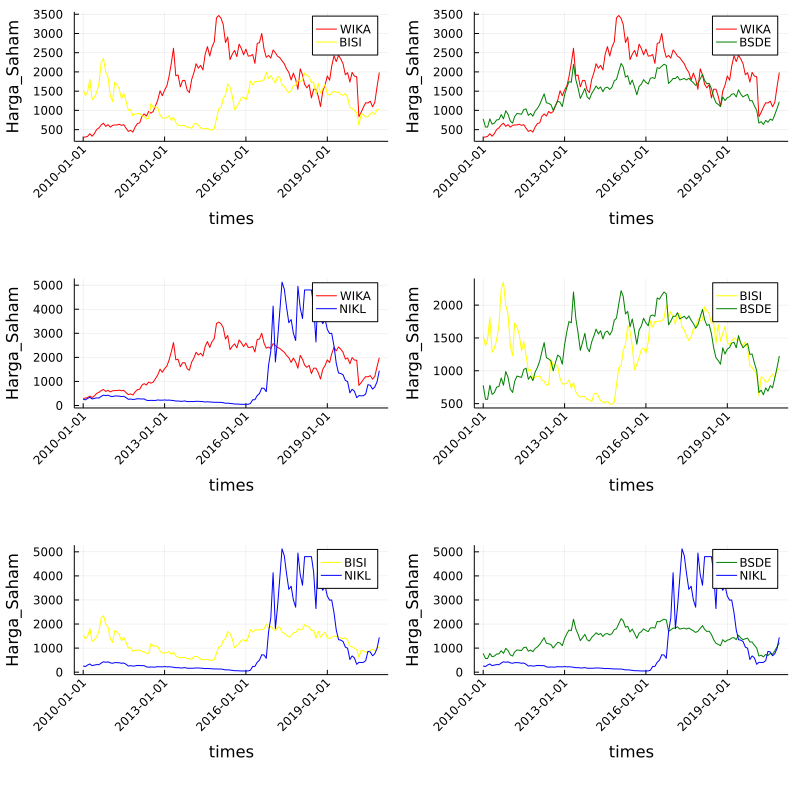

In [10]:
p1 = plot(times, A[1:end,1:2], labels=["WIKA" "BISI"], color =["red" "yellow"])
p2 = plot(times, A[1:end,1:2:3],labels=["WIKA" "BSDE"], color =["red" "green"])
p3 = plot(times, A[1:end,1:3:4],labels=["WIKA" "NIKL"], color =["red" "blue"])
p4 = plot(times, A[1:end,2:1:3],labels=["BISI" "BSDE"], color =["yellow" "green"])
p5 = plot(times, A[1:end,2:2:4],labels=["BISI" "NIKL"], color =["yellow" "blue"])
p6 = plot(times, A[1:end,3:4],labels=["BSDE" "NIKL"], color =["green" "blue"])
plot(p1, p2, p3, p4, p5, p6, layout = (3, 2), xrotation=45, size=(800,800))
xlabel!("times")
ylabel!("Harga_Saham")

Berdasarkan hasil plot di atas, terlihat bahwa data harga saham dari tahun ke tahun tidak mengalami harga yang seimbang. dari grafik di atas, harga saham jenis NIKL mengalami kenaikan yang cukup signifikan setelah tahun 2016. sedangkan untuk harga saham jenis lainnya hanya mengalami kenaikan ataupun perurunan yang cukup rendah.
Berdasarkan hal tersebut, dapat disimpulkan bahwa harga saham tidak mengalami kenaikan ataupun penurunan yang konstan. 

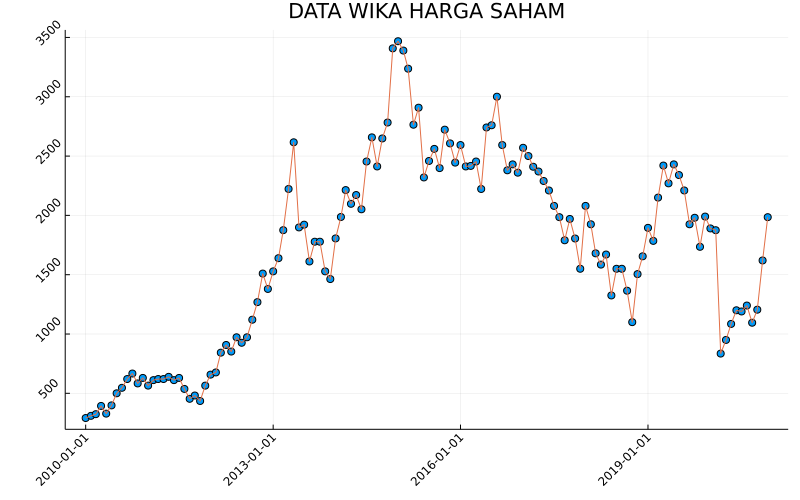

In [11]:
x1 = times
y1 = A[1:end,:1]
y2 = A[1:end,:2]
y3 = A[1:end,:3]
y4 = A[1:end,:4]
scatter(x1,y1, rotation=45,title = "DATA WIKA HARGA SAHAM" ,legend=false, size=(800,500))
plot!(x1,y1)

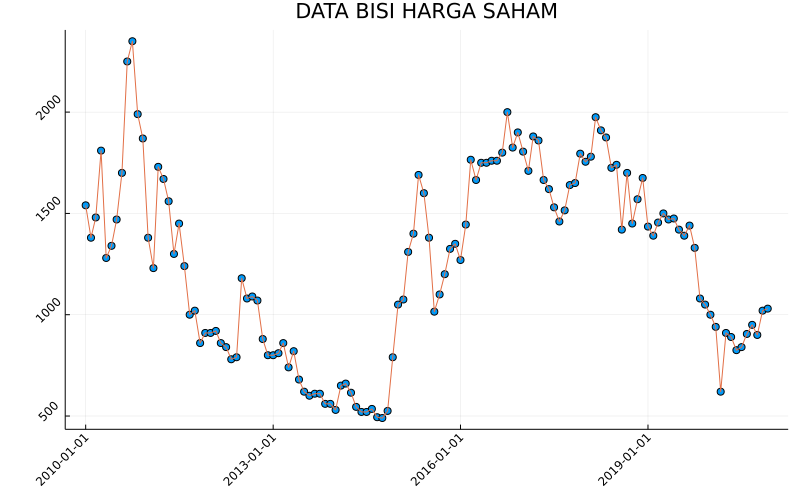

In [12]:
scatter(x1,y2, rotation=45,title = "DATA BISI HARGA SAHAM" ,legend=false, size=(800,500))
plot!(x1,y2)

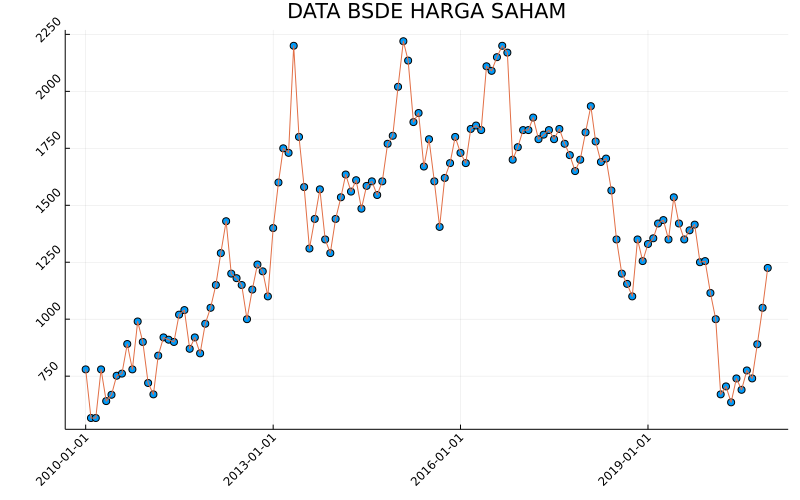

In [13]:
scatter(x1,y3, rotation=45,title = "DATA BSDE HARGA SAHAM" ,legend=false, size=(800,500))
plot!(x1,y3)

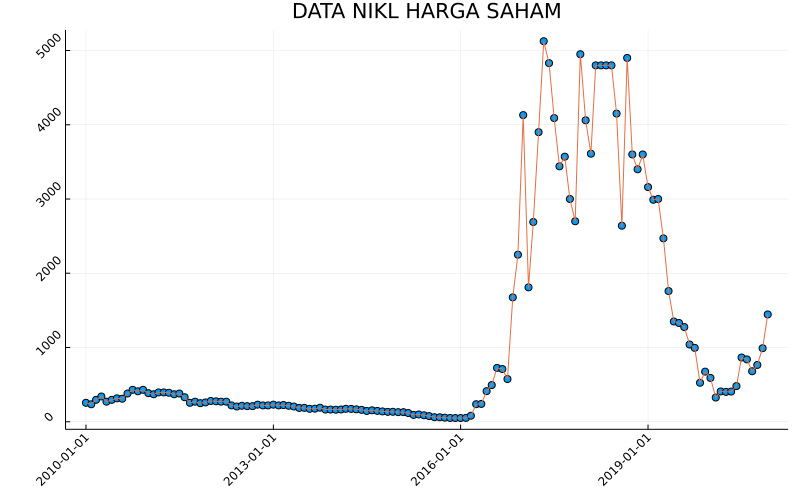

In [14]:
scatter(x1,y4, rotation=45,title = "DATA NIKL HARGA SAHAM" ,legend=false, size=(800,500))
plot!(x1,y4)

Hasil dari gambar di atas merupakan penyebaran harga saham baik untuk harga saham WIKA, BISI, BSDE, maupun NIKL.

# 🟠 PLOT semua data return saham

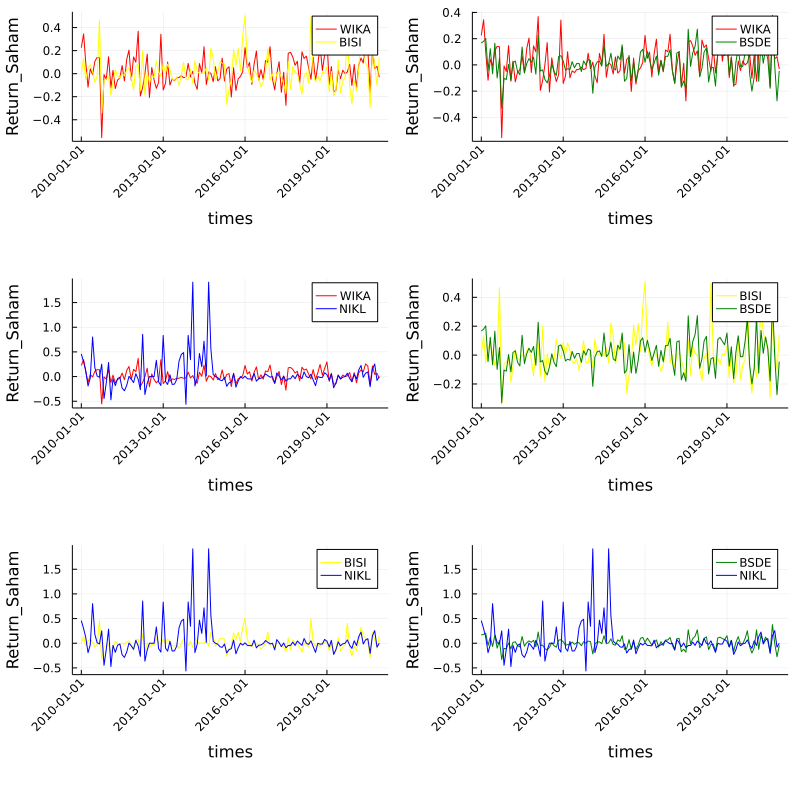

In [15]:
q1 = plot(times, B[1:end,1:2], labels=["WIKA" "BISI"],  color =["red" "yellow"])
q2 = plot(times, B[1:end,1:2:3],labels=["WIKA" "BSDE"], color =["red" "green"])
q3 = plot(times, B[1:end,1:3:4],labels=["WIKA" "NIKL"],  color =["red" "blue"])
q4 = plot(times, B[1:end,2:1:3],labels=["BISI" "BSDE"], color =["yellow" "green"])
q5 = plot(times, B[1:end,2:2:4],labels=["BISI" "NIKL"], color =["yellow" "blue"])
q6 = plot(times, B[1:end,3:4],labels=["BSDE" "NIKL"],  color =["green" "blue"])
plot(q1, q2, q3, q4, q5, q6, layout = (3, 2), xrotation=45, size=(800,800))
xlabel!("times")
ylabel!("Return_Saham")

Berdasarkan hasil plot di atas, terlihat bahwa return saham WIKA, BISI, dan BSDE masih berada pada interval -0,5-0,5 sedangkan return saham NIKL mempunyai interval yang berbeda. Hal tersebut terlihat pada tahun 2016-2017 return saham NIKL mengalami kenaikan yang signifikan dari tahun sebelumnya. 
Kasus ini hampir sama seperti kasus harga saham yaitu tidak mengalami kenaikan atun penurunan yang kontan.

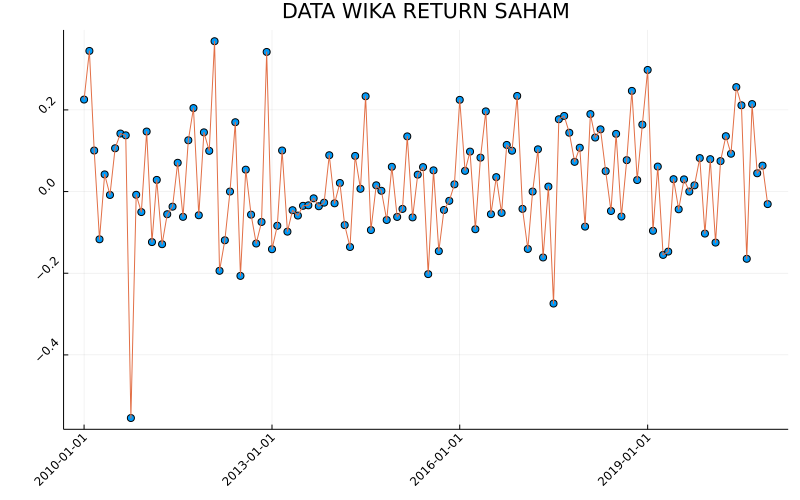

In [16]:
a1 = times
b1 = B[1:end,:1]
b2 = B[1:end,:2]
b3 = B[1:end,:3]
b4 = B[1:end,:4]
scatter(a1,b1, rotation=45,title = "DATA WIKA RETURN SAHAM" ,legend=false, size=(800,500))
plot!(a1,b1)

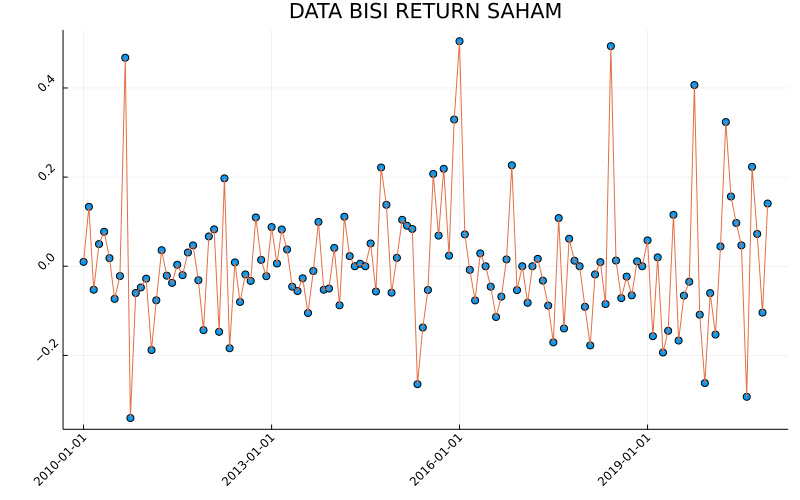

In [17]:
scatter(a1,b2, rotation=45,title = "DATA BISI RETURN SAHAM" ,legend=false, size=(800,500))
plot!(a1,b2)

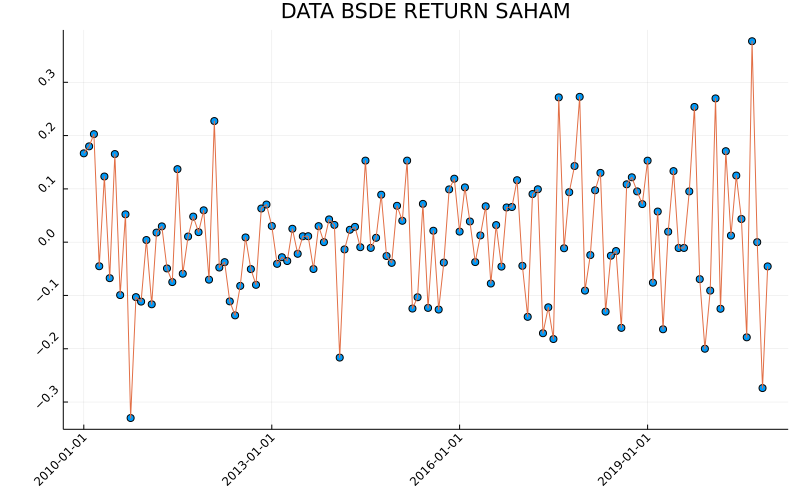

In [18]:
scatter(a1,b3, rotation=45,title = "DATA BSDE RETURN SAHAM" ,legend=false, size=(800,500))
plot!(a1,b3)

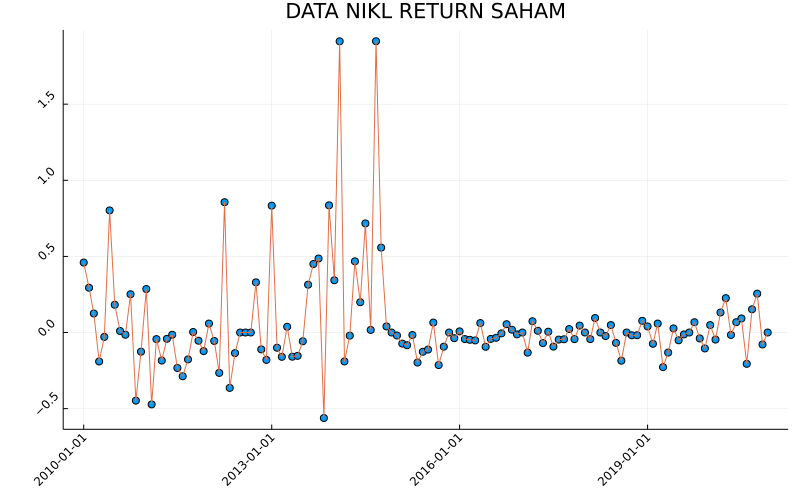

In [19]:
scatter(a1,b4, rotation=45,title = "DATA NIKL RETURN SAHAM" ,legend=false, size=(800,500))
plot!(a1,b4)

Hasil dari gambar di atas merupakan penyebaran return saham baik untuk return saham WIKA, BISI, BSDE, maupun NIKL.

# 🟠 PLOT using Violin

In [20]:
using StatsPlots

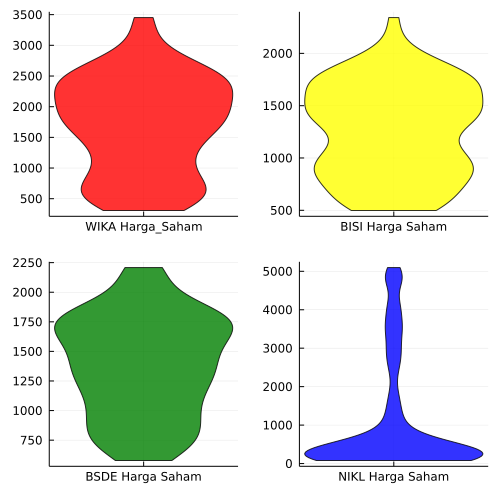

In [21]:
V_Wika = violin(["WIKA Harga_Saham"], A[1:end,:1], legend=false, alpha=0.8, color =:red)
V_Bisi = violin(["BISI Harga Saham"], A[1:end,:2], legend=false, alpha=0.8, color =:yellow)
V_Bsde = violin(["BSDE Harga Saham"], A[1:end,:3], legend=false, alpha=0.8, color =:green)
V_Nikl = violin(["NIKL Harga Saham"], A[1:end,:4], legend=false, alpha=0.8, color =:blue)
plot(V_Wika,V_Bisi,V_Bsde,V_Nikl, layout = (2,2), size=(500,500))

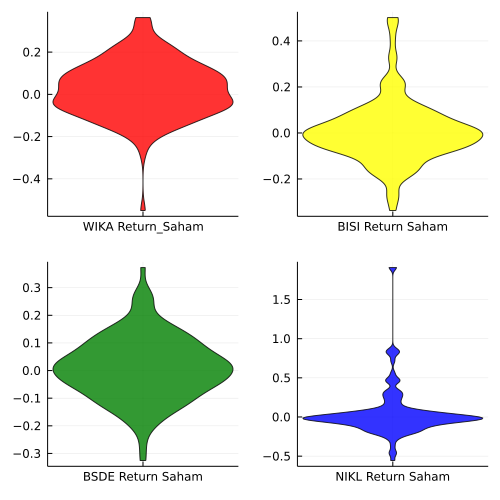

In [22]:
V_Wika = violin(["WIKA Return_Saham"], B[1:end,:1], legend=false, alpha=0.8, color =:red)
V_Bisi = violin(["BISI Return Saham"], B[1:end,:2], legend=false, alpha=0.8, color =:yellow)
V_Bsde = violin(["BSDE Return Saham"], B[1:end,:3], legend=false, alpha=0.8, color =:green)
V_Nikl = violin(["NIKL Return Saham"], B[1:end,:4], legend=false, alpha=0.8, color =:blue)
plot(V_Wika,V_Bisi,V_Bsde,V_Nikl, layout = (2,2), size=(500,500))

##  🟠 Menentukan mean, median, kuartil, min, dan max dari data harga saham

###  🟠 Harga Saham

In [23]:
using StatsBase
println("Deskripsi statistik Harga Saham : ")
describe(A[1:end,1])

Deskripsi statistik Harga Saham : 
Summary Stats:
Length:         132
Missing Count:  0
Mean:           1700.454700
Minimum:        291.713135
1st Quartile:   972.377075
Median:         1797.500000
3rd Quartile:   2372.502197
Maximum:        3468.145020
Type:           Float64


In [24]:
println("Deskripsi statistik Harga Saham : ")
describe(A[1:end,2])

Deskripsi statistik Harga Saham : 
Summary Stats:
Length:         132
Missing Count:  0
Mean:           1259.916667
Minimum:        490.000000
1st Quartile:   875.000000
Median:         1327.500000
3rd Quartile:   1665.000000
Maximum:        2350.000000
Type:           Float64


In [25]:
println("Deskripsi statistik Harga Saham : ")
describe(A[1:end,3])

Deskripsi statistik Harga Saham : 
Summary Stats:
Length:         132
Missing Count:  0
Mean:           1386.016879
Minimum:        566.198853
1st Quartile:   1035.000000
Median:         1417.500000
3rd Quartile:   1735.000000
Maximum:        2220.000000
Type:           Float64


In [26]:
println("Deskripsi statistik Harga Saham : ")
describe(A[1:end,4])

Deskripsi statistik Harga Saham : 
Summary Stats:
Length:         132
Missing Count:  0
Mean:           1103.742424
Minimum:        50.000000
1st Quartile:   188.500000
Median:         335.000000
3rd Quartile:   1335.000000
Maximum:        5125.000000
Type:           Float64


##  🟠 Menentukan mean, median, kuartil, min, dan max dari data return saham

### 🟠 Return Saham

In [27]:
println("Deskripsi statistik Return Saham : ")
describe(B[1:end,1])

Deskripsi statistik Return Saham : 
Summary Stats:
Length:         132
Missing Count:  0
Mean:           0.023866
Minimum:        -0.554667
1st Quartile:   -0.059424
Median:         0.019334
3rd Quartile:   0.104084
Maximum:        0.368182
Type:           Float64


In [28]:
println("Deskripsi statistik Harga Saham : ")
describe(B[1:end,2])

Deskripsi statistik Harga Saham : 
Summary Stats:
Length:         132
Missing Count:  0
Mean:           0.006780
Minimum:        -0.340426
1st Quartile:   -0.065380
Median:         0.000000
3rd Quartile:   0.063016
Maximum:        0.504762
Type:           Float64


In [29]:
println("Deskripsi statistik Harga Saham : ")
describe(B[1:end,3])

Deskripsi statistik Harga Saham : 
Summary Stats:
Length:         132
Missing Count:  0
Mean:           0.009569
Minimum:        -0.330000
1st Quartile:   -0.061317
Median:         0.010807
3rd Quartile:   0.076147
Maximum:        0.377049
Type:           Float64


In [30]:
println("Deskripsi statistik Harga Saham : ")
describe(B[1:end,4])

Deskripsi statistik Harga Saham : 
Summary Stats:
Length:         132
Missing Count:  0
Mean:           0.049343
Minimum:        -0.561743
1st Quartile:   -0.085671
Median:         -0.014760
3rd Quartile:   0.059635
Maximum:        1.913580
Type:           Float64


# 🟠 APPLICATION of AUTOREGRESSION METHOD FOR DATA SAHAM

In [31]:
using StatsBase

In [32]:
using VMLS

In [33]:
a1=A[1:120,:1]
b1=A[1:120,:2]
c1=A[1:120,:3]
d1=A[1:120,:4]
println(a1)
println(b1)
println(c1)
println(d1)

[291.713135, 310.234589, 324.125702, 393.581207, 328.756073, 398.211578, 500.079651, 546.383301, 620.469177, 666.772827, 583.42627, 629.729919, 564.904785, 611.208435, 620.469177, 620.469177, 638.990662, 611.208435, 629.729919, 537.122559, 453.77597, 481.558167, 435.254517, 564.904785, 657.512146, 676.033569, 842.726807, 907.551941, 851.987549, 972.377075, 926.073425, 972.377075, 1120.548828, 1268.720581, 1509.499634, 1379.849365, 1528.021118, 1639.149902, 1875.298706, 2222.576172, 2616.157471, 1898.450439, 1921.602295, 1611.367676, 1778.060913, 1778.060913, 1528.021118, 1463.196045, 1805.84314, 1986.42749, 2213.31543, 2097.556396, 2171.64209, 2051.252686, 2454.094482, 2657.830811, 2412.421143, 2648.570068, 2782.850586, 3407.950195, 3468.14502, 3389.428711, 3236.626465, 2764.329102, 2907.870605, 2319.813965, 2458.724854, 2560.593018, 2398.530029, 2722.655762, 2606.896729, 2444.83374, 2593.005615, 2412.421143, 2417.051514, 2454.094482, 2222.576172, 2741.177246, 2759.69873, 3000.477783, 

In [34]:
wika = a1; # import time series of wika
N1 = length(wika)

120

In [35]:
stdev(wika) # Standard deviation

819.8953575714761

In [36]:
rms(wika[2:end] - wika[1:end-1]) # RMS error for simple predictor zhat_{t+1} = z_t

213.86275033715296

In [37]:
rms(wika[25:end] - wika[1:end-24]) # RMS error for simple predictor zhat_{t+1} = z_{t-23}

933.0177570406476

In [38]:
M = 8 # Least squares fit of AR predictor with memory 8
ywika = wika[M+1:end];
Awika = hcat( [ wika[i:i+N1-M-1] for i = M:-1:1]...);
theta = Awika \ ywika;
ypred1 = Awika*theta;
# RMS error of LS AR fit
rms(ypred1 - ywika)

214.9600107288222

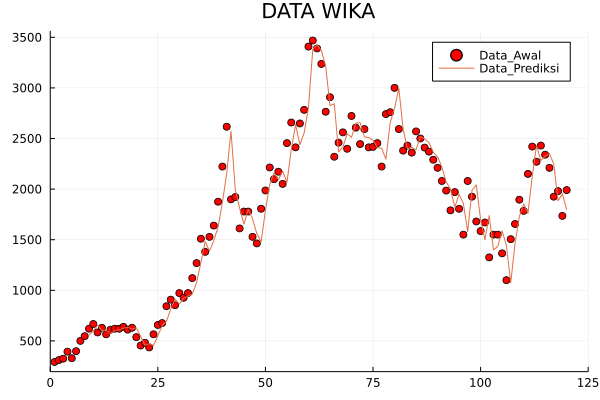

In [66]:
Nplot = 10*12
scatter(1:Nplot, wika[1:Nplot], color=:red,label="Data_Awal",title= "DATA WIKA" ,legend =true)
plot!(M+1:Nplot, ypred1[1:Nplot-M], label="Data_Prediksi",xlim=(0,125))

In [40]:
bisi = b1; # import time series of bisi
N2 = length(bisi)

120

In [41]:
stdev(bisi) # Standard deviation

454.94641618241394

In [42]:
rms(bisi[2:end] - bisi[1:end-1]) # RMS error for simple predictor zhat_{t+1} = z_t

168.08916201395803

In [43]:
rms(bisi[25:end] - bisi[1:end-24]) # RMS error for simple predictor zhat_{t+1} = z_{t-23}

656.3440567517416

In [44]:
M = 8 # Least squares fit of AR predictor with memory 8
ybisi = bisi[M+1:end];
Abisi = hcat( [ bisi[i:i+N2-M-1] for i = M:-1:1]...);
theta2 = Abisi \ ybisi;
ypred2 = Abisi*theta2;
# RMS error of LS AR fit
rms(ypred2 - ybisi)

151.75994247288565

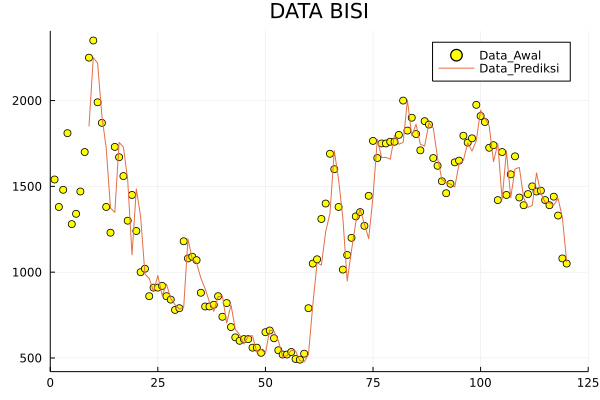

In [65]:
Nplot = 10*12
scatter(1:Nplot, bisi[1:Nplot], color=:yellow,label="Data_Awal",title= "DATA BISI" ,legend =true)
plot!(M+1:Nplot, ypred2[1:Nplot-M],label="Data_Prediksi", xlim=(0,125))

In [46]:
bsde = c1; # import time series of bisi
N3 = length(bsde)

120

In [47]:
stdev(bsde) # Standard deviation

409.09704391695306

In [48]:
rms(bsde[2:end] - bsde[1:end-1]) # RMS error for simple predictor zhat_{t+1} = z_t

143.1789997889123

In [49]:
rms(bsde[25:end] - bsde[1:end-24]) # RMS error for simple predictor zhat_{t+1} = z_{t-23}

481.1060273038989

In [50]:
M = 8 # Least squares fit of AR predictor with memory 8
ybsde = bsde[M+1:end];
Absde = hcat( [ bsde[i:i+N3-M-1] for i = M:-1:1]...);
theta3 = Absde \ ybsde;
ypred3 = Absde*theta3;
# RMS error of LS AR fit
rms(ypred3 - ybsde)

138.961234213934

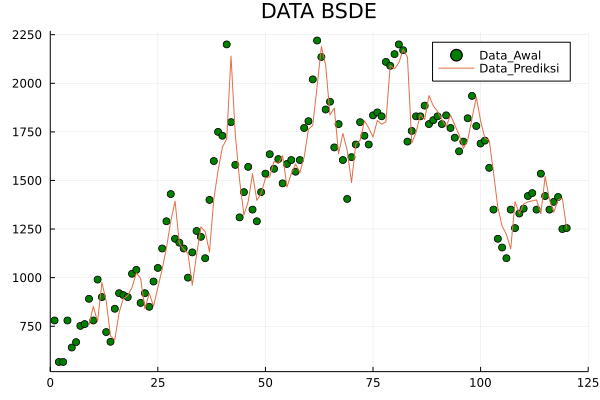

In [63]:
Nplot = 10*12
scatter(1:Nplot, bsde[1:Nplot], color=:green,label="Data_Awal",title= "DATA BSDE" ,legend =true)
plot!(M+1:Nplot, ypred3[1:Nplot-M],label="Data_Prediksi" ,xlim=(0,125))

In [52]:
nikl = d1; # import time series of bisi
N4 = length(bsde)

120

In [53]:
stdev(nikl) # Standard deviation

1536.9926116490894

In [54]:
rms(nikl[2:end] - nikl[1:end-1]) # RMS error for simple predictor zhat_{t+1} = z_t

537.591969852992

In [55]:
rms(nikl[25:end] - nikl[1:end-24]) # RMS error for simple predictor zhat_{t+1} = z_{t-23}

2066.4556083424586

In [56]:
M = 8 # Least squares fit of AR predictor with memory 8
ynikl = nikl[M+1:end];
Anikl = hcat( [ nikl[i:i+N4-M-1] for i = M:-1:1]...);
theta4 = Anikl \ ynikl;
ypred4 = Anikl*theta4;
# RMS error of LS AR fit
rms(ypred4 - ynikl)

506.58721153585935

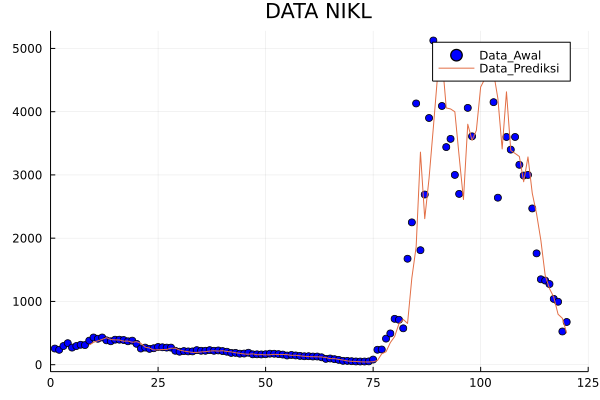

In [61]:
Nplot = 10*12
scatter(1:Nplot, nikl[1:Nplot], color=:blue,label="Data_Awal",title= "DATA NIKL" ,legend =true)
plot!(M+1:Nplot, ypred4[1:Nplot-M], label="Data_Prediksi",xlim=(0,125))

# 🥳 Finally...